In [586]:
!pip install minisom
!pip install neupy
!pip install neurolab
!pip install sklearn_lvq

In [587]:
import numpy as np
from minisom import MiniSom
from neupy.algorithms import SOFM, LVQ
import neurolab as nl
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D
import scipy.spatial
import sklearn_lvq
np.random.seed(1)

### Задание 1
Использовать слой Кохонена для выполнения кластеризации множества точек. Проверить качество разбиения.

Формируем входные данные для сети Кохонена

In [369]:
P, T = make_blobs(cluster_std=0.1, n_samples=80, n_features=2, centers=8, center_box=(0, 1.5), random_state=178)

Построим и обучим слой Кохонена

In [370]:
nn = nl.net.newc([[0, 1.5], [0, 1.5]], 8)
nn.train(P, epochs=500);

Epoch: 100; Error: 14.540243324292737;
Epoch: 200; Error: 12.814849301789927;
Epoch: 300; Error: 12.822122035580527;
Epoch: 400; Error: 12.887312142127804;
Epoch: 500; Error: 12.905676342452011;
The maximum number of train epochs is reached


In [371]:
centers = nn.layers[0].np['w']

In [374]:
centers

array([[0.52010871, 0.51516656],
       [0.87340769, 0.12744294],
       [1.04550893, 1.1198544 ],
       [1.2973425 , 0.47594185],
       [1.25975953, 1.43569282],
       [0.83875438, 1.32984925],
       [0.15712908, 0.0800968 ],
       [1.30641257, 0.12203851]])

Проверим качество разбиения. Создадим случайным образом 5 точек

In [435]:
X_test = [[np.random.uniform(0.0, 1.5), np.random.uniform(0.0, 1.5)] for _ in range(5)]

In [438]:
X_test

[[1.3182479766177662, 1.267101668088333],
 [1.3580884780629738, 0.6898203987252105],
 [0.8195202240305599, 1.1979053867280591],
 [0.42857827760122136, 0.7353802839298915],
 [0.8986654614688175, 0.023299913326253585]]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

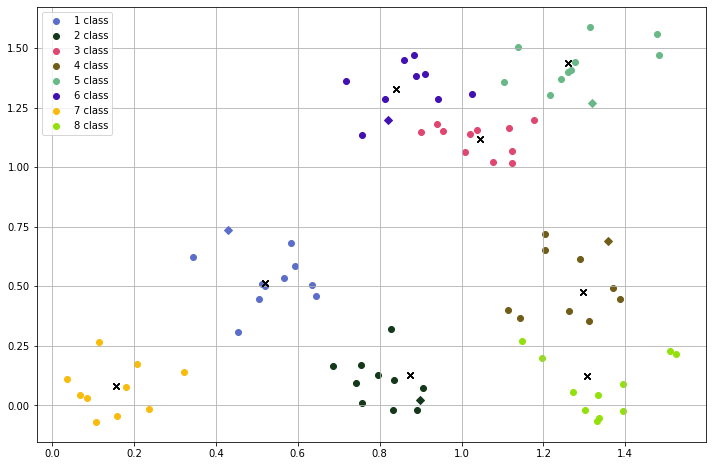

In [687]:


plt.figure(figsize=(12, 8))
for i in range(8):
    check = [0] * 8
    check[i] = 1
    check = np.array([check], np.float32)
    plts = np.array([j for j in P if np.array_equal(nn.sim([j]), check)])
    plts2 = np.array([j for j in X_test if np.array_equal(nn.sim([j]), check)])
    clr = np.random.rand(3)
    plt.scatter(plts[:, 0], plts[:, 1], c=clr, label=str(i + 1) + " class")
    plt.plot([x[0] for x in plts2], [x[1] for x in plts2], 'D',  color=clr)
    plt.plot(centers[:,0], centers[:, 1], 'kx')

plt.grid()
plt.legend()
plt.show()

### Задание 2
Использовать карту Кохонена для выполнения кластеризации множества точек.

In [416]:
P2, T2 = make_blobs(n_samples=80, cluster_std=0.1, n_features=2,
                    centers=8, center_box=(0, 1.5), random_state=178)

In [420]:
nn2 = MiniSom(2, 4, P2.shape[1],topology='hexagonal')
nn2.train(P2, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.13106901880330818


In [421]:
centers2 = nn2.get_weights().reshape(8,2)

In [409]:
centers2

array([[0.79023729, 0.09205505],
       [0.14908193, 0.07749172],
       [1.345935  , 0.13103264],
       [0.52998183, 0.53017433],
       [1.14922819, 1.00304019],
       [1.21230266, 0.5159144 ],
       [1.27254216, 1.42887332],
       [0.93428023, 1.25911401]])

In [424]:
X2 = [[np.random.uniform(0., 1.5), np.random.uniform(0., 1.5)] for _ in range(5)]

In [439]:
X2

[[0.8605192300084288, 0.004305490546738455],
 [0.9257173704310858, 0.48996735265814423],
 [0.7905871533864139, 1.3289131489661616],
 [0.5359046400037497, 1.362802726379699],
 [0.9350401736877041, 0.023731864269834424]]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

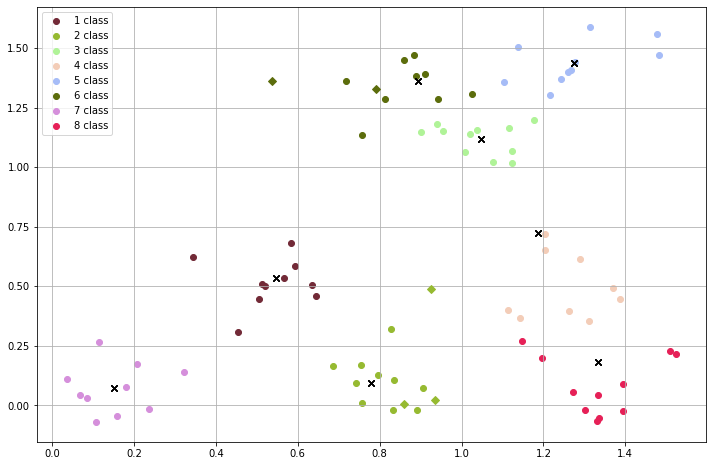

In [686]:

plt.figure(figsize=(12, 8))
for i in range(8):
    check = [0] * 8
    check[i] = 1
    check = np.array([check], np.float32)
    plts = np.array([j for j in P if np.array_equal(nn.sim([j]), check)])
    plts2 = np.array([j for j in X2 if np.array_equal(nn.sim([j]), check)])
    clr = np.random.rand(3)
    plt.scatter(plts[:, 0], plts[:, 1], c=clr, label=str(i + 1) + " class")
    plt.plot([x[0] for x in plts2], [x[1] for x in plts2], 'D',  color=clr)
    plt.plot(centers2[:,0], centers2[:, 1], 'kx')

plt.grid()
plt.legend()
plt.show()

### Задание 3
Использовать карту Кохонена для нахождения одного из решений задачи коммивояжера.

Сгенерируем набор из 20 случайных точек из диапазона [-1.5, 1.5].

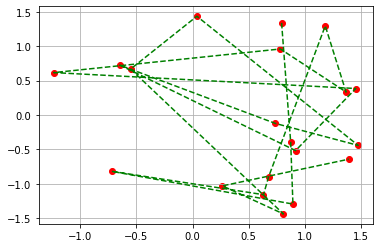

In [787]:
z = np.array([[np.random.uniform(-1.5, 1.5), np.random.uniform(-1.5, 1.5)] for _ in range(20)])
plt.plot(z[:, 0], z[:, 1], '--', c='g')
plt.scatter(z[:, 0], z[:, 1], c='r')
plt.grid()

In [817]:
nn3 = MiniSom(1, 20, z.shape[1], topology='hexagonal', sigma=2)
nn3.random_weights_init(z)

/usr/local/lib/python3.7/dist-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


In [818]:
nn3.train(z, 300, verbose=False)

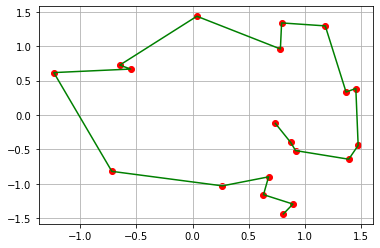

In [819]:
plt.scatter(z[:, 0], z[:, 1], c='red')
visit_order = np.argsort([nn3.winner(p)[1] for p in z])
plt.plot(z[visit_order][:,0], z[visit_order][:,1], c='green')
plt.grid()

###Задание 4
Использовать сеть векторного квантования, обучаемую с учителем, (LVQ-сеть) для классификации точек в случае, когда классы не являются линейно разделимыми.

In [596]:
points = np.array([[0.5, 0.7, 0.4, 0.6, -0.7, -1.3, 0.5, 1.3, -0.2, 0.7, -1, -0.2],
                   [0.7, -0.4, -1, -1.5, -1.4, 0.9, -0.6, -1.4, -0.4, 0.8, -0.1, 0.4]])
target = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])
points = points.T

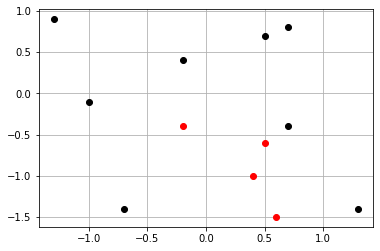

In [666]:
plt.plot([points[i][0] for i in range(12) if target[i] == 0], 
         [points[i][1] for i in range(12) if target[i] == 0], 'ro')
plt.plot([points[i][0] for i in range(12) if target[i] == 1], 
         [points[i][1] for i in range(12) if target[i] == 1], 'ko')
plt.grid(True)

Строим LVQ-сеть и обучаем.

In [657]:
lvq = sklearn_lvq.LmrslvqModel([4, 8])


In [658]:
lvq.fit(points, target)

LmrslvqModel(prototypes_per_class=[4, 8])

Для этого классифицируем точки области [-1.5;1.5]x[-1.5;1.5] с шагом 0.1

In [659]:
coef1_x = []
coef1_y = []
coef2_x = []
coef2_y = []

for x in np.arange(-1.5, 1.51, 0.1):
    for y in np.arange(-1.5, 1.51, 0.1):
        if lvq.predict([[x, y]]) == 1:
            coef1_x.append(x)
            coef1_y.append(y)
        else:
            coef2_x.append(x)
            coef2_y.append(y)


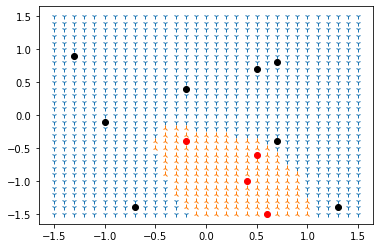

In [680]:
plt.plot(coef1_x, coef1_y, '1')
plt.plot(coef2_x, coef2_y, '2')
plt.plot([points[i][0] for i in range(12) if target[i] == 0], 
         [points[i][1] for i in range(12) if target[i] == 0], 'ro')
plt.plot([points[i][0] for i in range(12) if target[i] == 1], 
         [points[i][1] for i in range(12) if target[i] == 1], 'ko');